# HW2 | Problem 2
#### Cormac Taylor
#### I pledge my honor that I have abided by the Stevens Honor System.

# Imports

In [291]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

# Libraries
- NumPy
- Pandas
- Matplotlib
- PIL

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from PIL import Image
import glob

# 2.1 |  Principal Component Analysis

## Importing data and displaying first

In [293]:
image_paths = glob.glob("./face_data/face*.bmp")
images = [Image.open(img_path) for img_path in image_paths]

## Flattening data and creating data matrix

In [294]:
data_matrix_matrix = np.array(images)
data_vector_matrix = [matrix.flatten() for matrix in data_matrix_matrix]

face_data = np.array(data_vector_matrix)

## Split train/test

In [295]:
X_train = face_data[:157]
X_test = face_data[157:]

## Calculate mean image and center images

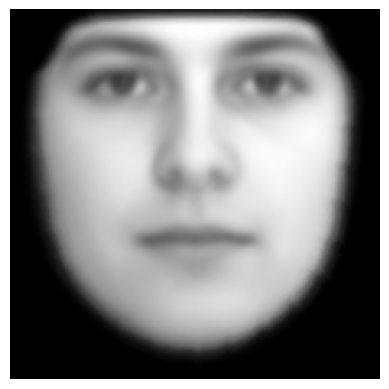

In [296]:
mean_X_train = np.mean(X_train, axis=0)

mpl.imshow(mean_X_train.reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()

centered_X_train = X_train - mean_X_train

## CPA Code

In [297]:
class PCA:    
    
    def rescale_eigenvectors(self, X, eigenvectors):
        return np.array([(np.dot(X.T, vect) / np.linalg.norm(np.dot(X.T, vect))) for vect in eigenvectors])
    
    def get_K_eigenvectors(self, K, X):
        cov = np.cov(X)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        sort_dec = eigenvalues.argsort()[::-1]   
        sorted_eigenvectors = eigenvectors.T[sort_dec, :]

        K_eigenvectors = sorted_eigenvectors[:K, :]
        
        return self.rescale_eigenvectors(X, K_eigenvectors)
        
        

## Applying CPA

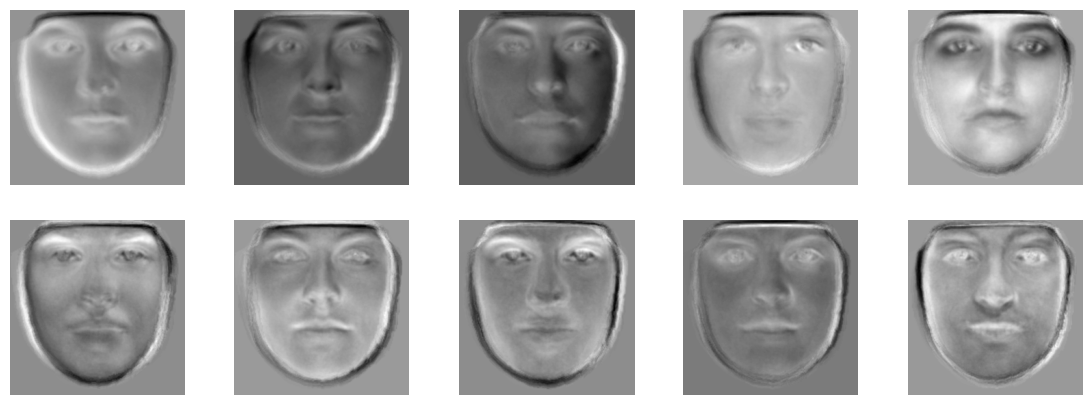

In [298]:
pca = PCA()
K = 30

eigenfaces = pca.get_K_eigenvectors(K, centered_X_train)

rows, cols = 2, 5
mpl.figure(figsize=(14, 5))
for i in range(1,11):
    eigenface = eigenfaces[i].reshape(256,256)
    mpl.subplot(rows, cols, i)
    mpl.imshow(eigenface, cmap='gray')
    mpl.axis('off')
mpl.show()


# 2.2 Reconstruction

## Getting test mean and centering data

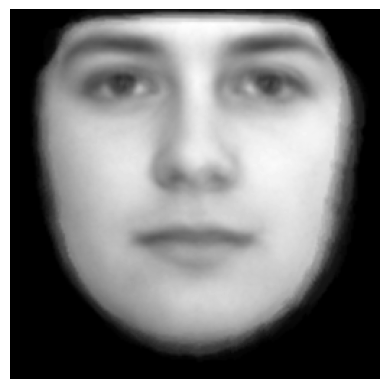

In [299]:
mean_X_test = np.mean(X_test, axis=0)

mpl.imshow(mean_X_test.reshape(256, 256), cmap='gray')
mpl.axis('off')
mpl.show()

centered_X_test = np.array([(x - mean_X_test) for x in X_test])

## Reconstructing the faces

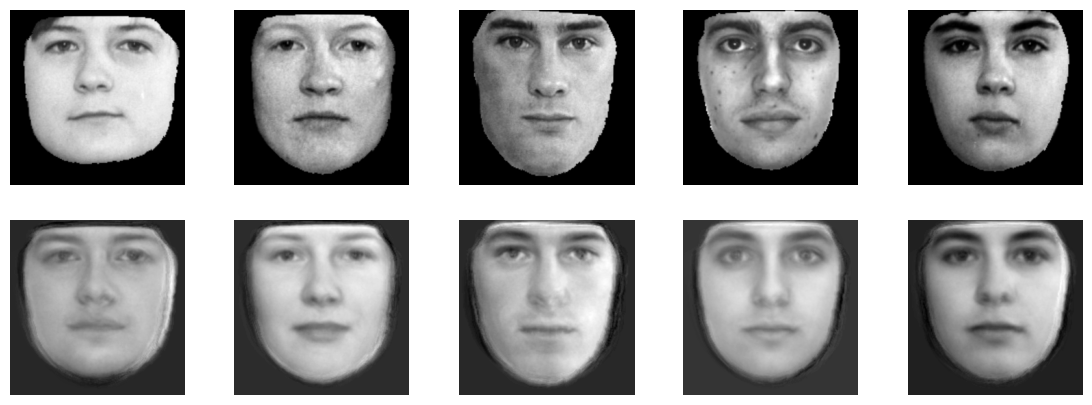

Error: 15950232.024779689


In [300]:
rows, cols = 2, 5
mpl.figure(figsize=(14, 5))

for i in range(1,6):
    mpl.subplot(rows, cols, i)
    mpl.imshow(X_test[i].reshape(256,256), cmap='gray')
    mpl.axis('off')

    recons = mean_X_test + np.dot(np.dot(centered_X_test[i], eigenfaces.T), eigenfaces)
    mpl.subplot(rows, cols, i + 5)
    mpl.imshow(recons.reshape(256,256), cmap='gray')
    mpl.axis('off')
mpl.show()

# centered_X_test N x D
# eigenfaces K x D
def get_error(X, centered_X, eigenfaces, mean_X):
    all_faces_recon = np.dot(np.dot(centered_X, eigenfaces.T), eigenfaces) + mean_X
    norm_diff = np.linalg.norm(all_faces_recon - X)
    return norm_diff * norm_diff / len(X)

print(f'Error: {get_error(X_test, centered_X_test, eigenfaces, mean_X_test)}')

# 2.3 |  Effect of K


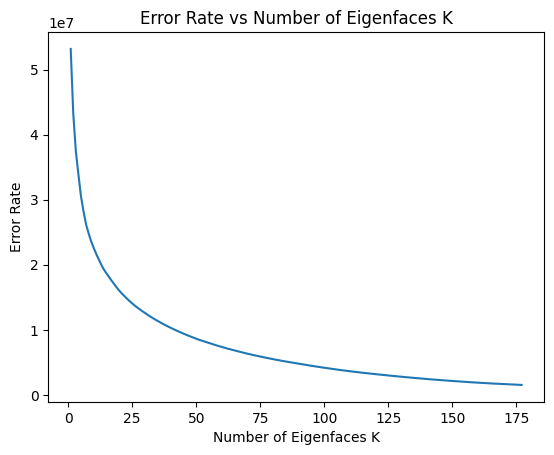

In [303]:
eigenfaces = pca.get_K_eigenvectors(len(face_data), face_data)

errors = []
for i in range(1, len(face_data) + 1):
    mean_X = np.mean(face_data, axis=0)
    centered_X = face_data - mean_X
    errors.append(get_error(face_data, centered_X, eigenfaces[:i], mean_X))

mpl.plot(np.arange(1, len(face_data) + 1), errors)
mpl.title("Error Rate vs Number of Eigenfaces K")
mpl.xlabel("Number of Eigenfaces K")
mpl.ylabel("Error Rate")
mpl.show()